<a href="https://colab.research.google.com/github/Anitha0120/weather-data-analysis-prediction/blob/main/Weather_data_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample weather.csv generated successfully in data/ folder!

Data loaded and cleaned successfully!

        date  temperature  humidity  windspeed
0 2023-01-01    25.129044        63         14
1 2023-01-02    19.587728        45         19
2 2023-01-03    15.133023        44         15
3 2023-01-04    25.649524        69         10
4 2023-01-05    32.853074        61          0


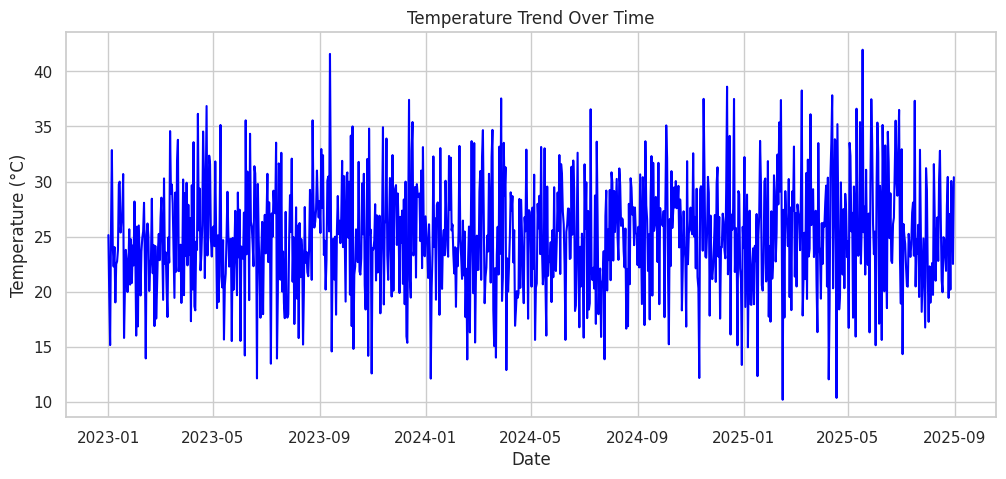

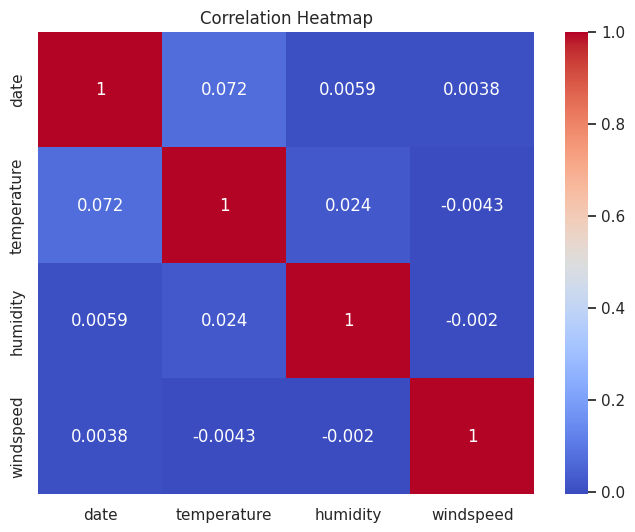

Model Performance -> MSE: 26.11, R²: 0.01

Future temperature predictions saved to future_predictions.csv
         date  predicted_temperature
0  2025-08-31              25.616240
1  2025-09-01              25.617554
2  2025-09-02              25.618868
3  2025-09-03              25.620182
4  2025-09-04              25.621495
5  2025-09-05              25.622809
6  2025-09-06              25.624123
7  2025-09-07              25.625436
8  2025-09-08              25.626750
9  2025-09-09              25.628064
10 2025-09-10              25.629378
11 2025-09-11              25.630691
12 2025-09-12              25.632005
13 2025-09-13              25.633319
14 2025-09-14              25.634633


In [19]:
# Weather Data Analysis and Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# 1. Generate Sample Dataset

os.makedirs("data", exist_ok=True)

dates = pd.date_range(start='2023-01-01', end='2025-08-31')
temperature = np.random.normal(loc=25, scale=5, size=len(dates))
humidity = np.random.randint(40, 90, size=len(dates))
windspeed = np.random.randint(0, 20, size=len(dates))

df = pd.DataFrame({
    "date": dates,
    "temperature": temperature,
    "humidity": humidity,
    "windspeed": windspeed
})

df.to_csv("data/weather.csv", index=False)
print("Sample weather.csv generated successfully in data/ folder!\n")

# 2. Load and Preprocess Data

df = pd.read_csv("data/weather.csv", parse_dates=['date'])
df = df.sort_values('date')
df = df.dropna()
print("Data loaded and cleaned successfully!\n")
print(df.head())

# 3. Exploratory Data Analysis
# Temperature trend
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['temperature'], color='blue')
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Train Linear Regression Model
X = np.array(df['date'].map(lambda x: x.toordinal())).reshape(-1,1)
y = df['temperature'].values

model = LinearRegression()
model.fit(X, y)

# Predictions on training data
preds = model.predict(X)
mse = mean_squared_error(y, preds)
r2 = r2_score(y, preds)
print(f"Model Performance -> MSE: {mse:.2f}, R²: {r2:.2f}\n")

# 5. Predict Future Temperatures
future_days = 15
future_dates = pd.date_range(start=df['date'].iloc[-1], periods=future_days)
X_future = np.array(future_dates.map(lambda x: x.toordinal())).reshape(-1,1)
future_preds = model.predict(X_future)

future_df = pd.DataFrame({"date": future_dates, "predicted_temperature": future_preds})
future_df.to_csv("future_predictions.csv", index=False)
print("Future temperature predictions saved to future_predictions.csv")
print(future_df)
